In [1]:
from sympy import init_session
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib widget
import os, glob, pathlib
from loky import get_reusable_executor
import dill as pickle
init_session()

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [2]:
%run "symbols.ipynb"

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/

-1.5455341716765871
1.8956507412695471
0.7631428283688879
9.222398400061197
8.002091900497529


<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_60711/1608348942.py:5: SyntaxWarning: invalid escape sequence '\,'
  "f_1 f_2 f_3 f_4 tau lambda varpi varpi_p gamma \\omega_{\\rm{ext}} \\omega_{\\rm{p\,ext}} theta Theta phi"


In [3]:
f2val_outside

In [4]:
f1val_outside

See Notebook.pdf for expression & units.

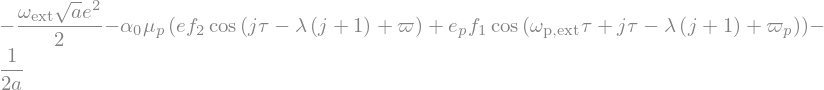

In [5]:
H_expr = to_orbelts(
    -1 / (2 * a)
    - mu_p
    * alpha0
    * (
        f1 * e_p * cos((j + 1) * l - j * tau - pom_p - om_p * tau)
        + f2 * e * cos((j + 1) * l - j * tau - pom)
    )
    - G * om
)
H_expr

- $\alpha=a_p/a$
- $\alpha_0 = a_p/a_0 = (j/(j+1))^{2/3}$

Assume that the $1/\sqrt{\Lambda}$ factor does not matter in the perturbation Hamiltonian. Set $=\alpha_0^{1/4}$

In [6]:
alpha = symbols("alpha", positive=True)
alpha

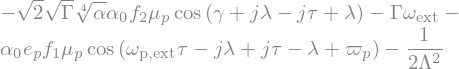

In [7]:
#H1_expr = to_canonical(H_expr).subs(f2/sqrt(L),f2*alpha0**Rational(1,4)).expand()
H1_expr = to_canonical(H_expr).subs(f2/sqrt(L),f2*alpha**Rational(1,4)).expand()
H1_expr

In [8]:
Gp = symbols("\\Gamma'", positive=True)
gp = symbols("\\gamma'")
Gp

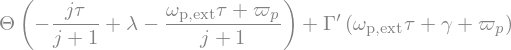

In [9]:
F2_expr = Th*(l - j/(j+1)*tau- (pom_p + om_p*tau)/(j+1)) + Gp*(g+om_p*tau+pom_p)
F2_expr

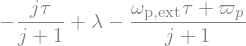

In [10]:
th_expr = F2_expr.diff(Th)
gp_expr = F2_expr.diff(Gp)
L_expr = F2_expr.diff(l)
G_expr = F2_expr.diff(g)
display(
    th_expr,
    gp_expr,
    L_expr,
    G_expr,
)

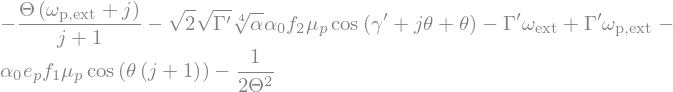

In [11]:
H2_expr = term_simplify(
    H1_expr.subs(l, solve(th_expr - th, l)[0])
    .subs(L, solve(L - L_expr, L)[0])
    .subs(g, solve(gp_expr - gp, g)[0])
    .subs(G, G_expr)
    + F2_expr.diff(tau)
)
H2_expr

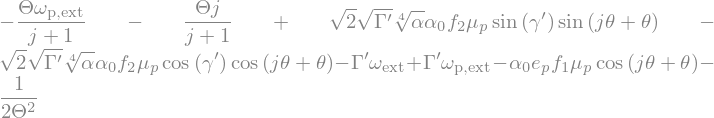

In [12]:
H3_expr = (
    H2_expr
    - H2_expr.coeff(f2) * f2
    + H2_expr.coeff(H2_expr.coeff(f2).find(cos).pop())
    * (
        cos((j + 1) * th) * cos(gp)
        - sin((j + 1) * th) * sin(gp)
    )
).expand()
H3_expr

Check to make sure trig expand worked

In [13]:
(H3_expr - H2_expr).simplify()

In [14]:
X4,Y4 = symbols("X_4 Y_4")

The issue is here, these aren't canonical variables

In [15]:
X4_G = sqrt(2*Gp)*sin(gp)
Y4_G = sqrt(2*Gp)*cos(gp)

In [16]:
Rational(1,2)*(X4_G**2+Y4_G**2).simplify()

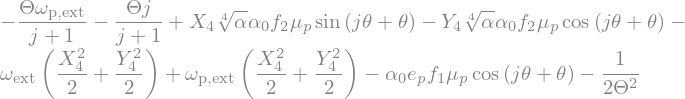

In [17]:
H4_expr = H3_expr.subs(X4_G,X4).subs(Y4_G,Y4).subs(Gp,Rational(1,2)*(X4**2+Y4**2))
H4_expr

In [18]:
X5, Y5 = symbols("X_5 Y_5")

In [19]:
Y4*H4_expr.find(cos).pop()

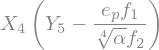

In [20]:
F5_expr = X4*(Y5-H4_expr.coeff(f1*H4_expr.find(cos).pop())*f1/(H4_expr.coeff(Y4*H4_expr.find(cos).pop())))
F5_expr

In [21]:
X5_expr = F5_expr.diff(Y5)
X5_expr

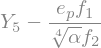

In [22]:
Y4_expr = F5_expr.diff(X4)
Y4_expr

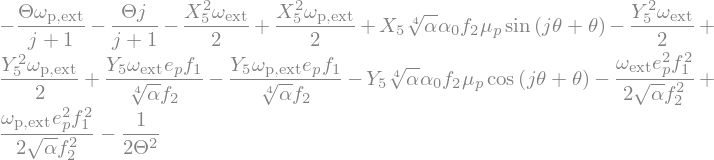

In [23]:
H5_expr = H4_expr.subs(X4,solve(X5_expr-X5,X4)[0]).subs(Y4,Y4_expr).expand()
H5_expr

In [24]:
X5_Phi = sqrt(2*Phi)*sin(phi)
Y5_Phi = sqrt(2*Phi)*cos(phi)

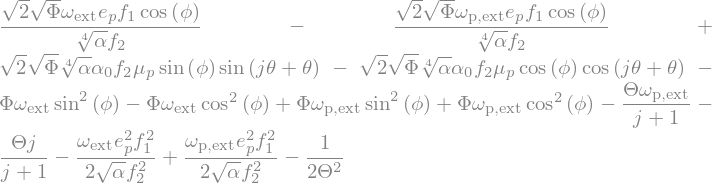

In [25]:
H6_expr = H5_expr.subs(X5,X5_Phi).subs(Y5,Y5_Phi)
H6_expr

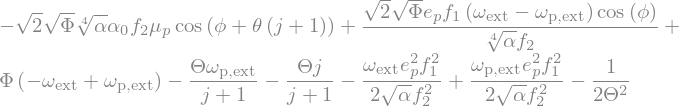

In [26]:
H7_expr = (H6_expr - H6_expr.coeff(mu_p)*mu_p).expand()-H6_expr.coeff(H6_expr.find(sin).pop()*H6_expr.coeff(H6_expr.find(sin).pop()).find(sin).pop())*cos(phi+(j+1)*th)
H7_expr = (H7_expr - (H7_expr.coeff(Phi) * Phi).expand()) + Phi * (H7_expr.coeff(Phi).simplify())
H7_expr = H7_expr.collect(H7_expr.coeff(f1).coeff(om)*f1)
H7_expr

In [27]:
(H6_expr-H7_expr).simplify()

In [28]:
Rational(1,2)*(X5_Phi**2+Y5_Phi**2).simplify()

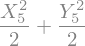

In [29]:
Phi_expr = Rational(1,2)*(X5**2+Y5**2)
Phi_expr

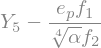

In [30]:
Y4_expr

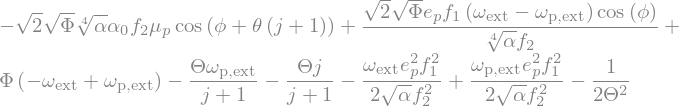

In [31]:
H7_expr

Drop constants.

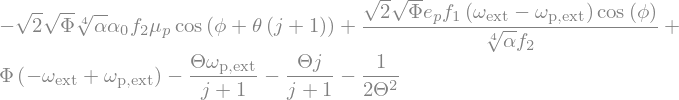

In [32]:
H8_expr = H7_expr.subs(f1**2/f2**2,0) 
H8_expr

Assume $\Gamma\approx \frac12\sqrt{1/\alpha_0}e^2$ in $\Phi$ expression

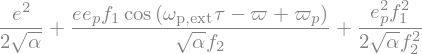

In [33]:
Phi_orbelts = Phi_expr.subs({X5: X5_expr, Y5: solve(Y4 - Y4_expr, Y5)[0]}).expand().subs({X4:X4_G,Y4:Y4_G}).subs({gp:gp_expr,Gp:solve(G-G_expr,Gp)[0]}).simplify()
#Phi_orbelts = to_orbelts(Phi_orbelts).subs(a,1/alpha0)
Phi_orbelts = to_orbelts(Phi_orbelts).subs(a,1/alpha)
Phi_orbelts

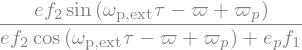

In [34]:
tan_phi_orbelts = (X5/Y5).subs({X5: X5_expr, Y5: solve(Y4 - Y4_expr, Y5)[0]}).expand().subs({X4:X4_G,Y4:Y4_G}).subs({gp:gp_expr,Gp:solve(G-G_expr,Gp)[0]}).simplify()
tan_phi_orbelts = to_orbelts(tan_phi_orbelts).subs(a,1/alpha)
tan_phi_orbelts

In [35]:
Th_orbelts = solve(L-L_expr,Th)[0]
Th_orbelts = to_orbelts(Th_orbelts)
Th_orbelts 

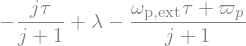

In [36]:
th_expr

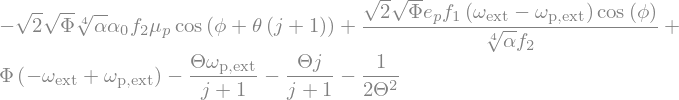

In [37]:
H8_expr

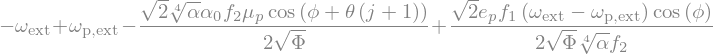

In [38]:
H8_expr.diff(Phi)

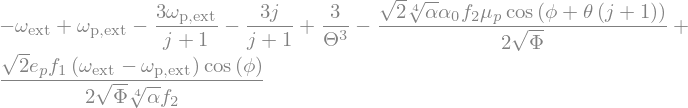

In [39]:
3*H8_expr.diff(Th) +  H8_expr.diff(Phi)

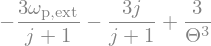

In [40]:
3*H8_expr.diff(Th)

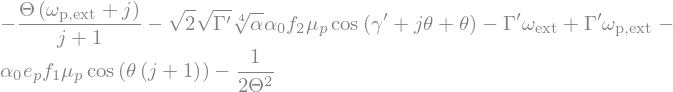

In [41]:
H2_expr

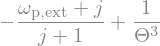

In [42]:
H2_expr.diff(Th)

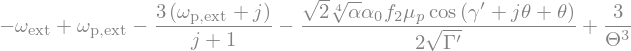

In [43]:
3*H2_expr.diff(Th) + H2_expr.diff(Gp)

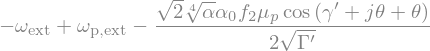

In [44]:
H2_expr.diff(Gp)

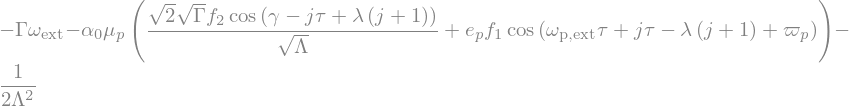

In [45]:
to_canonical(H_expr)

In [46]:
1e-3**(4/3)/sqrt(0.01)

In [47]:
1e-5**(1/3)

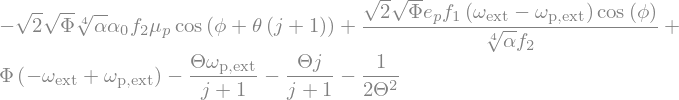

In [48]:
H8_expr

In [49]:
5e-4+0.04**2